# DAY 2: Models - Exercise 3.
A major limitation of the ensemble mean is that it does not contain information on the prediction uncertaintiy <br>
In this excersice we will be: <br>
1. We will understand the ensemble spread as an indicator of forecast uncertainty.<br>

The data for this excersise is below - this is the same data as Ex-2 <br>
A forecasted amount of rainfall is given for each year and the months OND. 

In [1]:
import numpy as np
import xarray as xr
from Data import location
da = location('Kenya')

Rainfall for 1994, Member 2: 4.38


## Minimums and Maximums
For this exercise we will need to determine the minimum and maximum forecasted rainfall for each year. <br>
This will show us the **Spread** in the that years members predictions. <br>
<br>
We are going to use the same principles in python that we used to calculate the Mean for each year in Ex-2.<br>
Fill in the "()" with the correct words out of Min and Max respecively. 


In [2]:
#First we create an empty array to store the data in
Yearly_Forecast_Min = []
Yearly_Forecast_Max = []

#Then we need to select for each year all the values accosiated with it
for year in da.year.values:
    data = da.sel(year=year)
    
    #now we can use the function min and max to return the yearly min and max across the members 
    Min = data.min().item()
    Max = data.max().item()
    
    #Now we can store them into the list
    Yearly_Forecast_Min.append(Min)
    Yearly_Forecast_Max.append(Max)

    #Yearly_Forecast_Min.append( ) -edit
    #Yearly_Forecast_Max.append( ) -edit


print("Yearly_Forecast_Minimum for 1993-2016:",Yearly_Forecast_Min)
print("Yearly_Forecast_Maximum for 1993-2016:",Yearly_Forecast_Max)

Yearly_Forecast_Minimum for 1993-2016: [1.61, 3.16, 1.75, 0.83, 3.17, 1.73, 1.47, 1.42, 1.31, 1.63, 1.44, 1.82, 1.44, 2.44, 1.81, 1.44, 1.77, 1.6, 2.28, 2.01, 1.41, 1.82, 3.11, 1.44]
Yearly_Forecast_Maximum for 1993-2016: [3.35, 5.93, 3.24, 3.23, 6.37, 2.83, 3.09, 3.17, 3.44, 4.09, 3.63, 3.96, 2.65, 5.11, 3.67, 3.28, 3.56, 3.31, 5.07, 4.59, 2.76, 3.45, 5.64, 2.78]


## Quantiles
Like before we need to seperate where the data gets outside a certain bound. <br>
Before we used Terciles <br>
This time we will use quantiles <br>
Quantiles seperate data at 25% and 75%. <br>
<br>
The first one (upper quantile) has been done for you. <br>
**Copy this and change the value to caculate the 25% lower quantile.** <br>
The cell will have no output when run, to check your work you must run the cell below the next


In [3]:
RF_upper_quantile = np.percentile(da, 75.00)
RF_lower_quantile = np.percentile(da, 25.00)
## -edit

In [4]:
print("This is the upper quantile for all the data:", RF_upper_quantile)
print("This is the lower quantile for all thed data:", RF_lower_quantile)

This is the upper quantile for all the data: 3.185
This is the lower quantile for all thed data: 2.05


With this principle we must now find the quantile for each year. <br>
Just like we found the min and max for each year<br>
<br>
Using the quantiles excersice fill in the empty () like we did in the Min, Max excersice. 

In [5]:
#First we create an empty array to store the data in
Yearly_Forecast_LQ = []
Yearly_Forecast_UQ = []

#Then we need to select for each year all the values accosiated with it
for year in da.year.values:
    data = da.sel(year=year)
    
    #now we can use the functions as above to return the yearly quantiles
    RF_lower_quantile = np.percentile(data, 25.00, method = 'closest_observation')
    RF_upper_quantile = np.percentile(data, 75.00, method = 'closest_observation')
    
    #Now we can store them into the list
    Yearly_Forecast_UQ.append(RF_upper_quantile)
    Yearly_Forecast_LQ.append(RF_lower_quantile)

    #Yearly_Forecast_LQ.append( ) -edit
    #Yearly_Forecast_UQ.append( ) -edit

#Finally we round the values in the list for easy readability 
Yearly_Forecast_LQ = np.round(Yearly_Forecast_LQ,3)
Yearly_Forecast_UQ = np.round(Yearly_Forecast_UQ,2)
print("Yearly_Forecast_LQ for 1993-2016:",Yearly_Forecast_LQ)
print("Yearly_Forecast_UQ for 1993-2016:",Yearly_Forecast_UQ)

Yearly_Forecast_LQ for 1993-2016: [2.1  3.43 2.14 1.38 4.35 1.9  1.74 1.68 1.63 2.58 1.94 2.31 1.72 3.39
 2.09 1.7  2.27 1.93 2.85 2.5  1.56 2.29 3.47 1.91]
Yearly_Forecast_UQ for 1993-2016: [2.49 5.06 2.59 1.92 5.55 2.36 2.35 2.53 2.56 3.23 2.98 3.03 2.48 4.17
 2.95 2.44 3.   2.5  3.42 3.35 2.21 2.93 4.43 2.56]


## Excersice 2
We will now load in some results from ex-2. <br>
This will be used for comparison<br>
Specifically, we will be loading in the Observed Rainfall and the Ensemble mean for each year.<br>
For clarity - this is the data under the subheadings **Observed Rainfall** and **Mean Per Year**

In [6]:
#-edit for loading directly 
Obs_Rain =  [1.52,2.93,1.95,1.51,5.56,1.33,2.04,2.34,1.99,2.95,1.90,2.40,1.15,4.31,1.83,1.98,2.65,1.55,3.86,2.72,2.25,2.31,3.13,1.70]
Yearly_Forecast_mean =[2.42, 4.44, 2.44, 1.76, 4.95, 2.16, 2.11, 2.18, 2.22, 2.95, 2.58, 2.72, 2.09, 3.82, 2.56, 2.21, 2.64, 2.25, 3.3, 3.07, 1.97, 2.67, 4.11, 2.2 ]

print("This is the averaged Observed Rainfall for OND each year:", Obs_Rain)
print("This is the averaged Forecasted Rainfall for OND each year:", Yearly_Forecast_mean)


This is the averaged Observed Rainfall for OND each year: [1.52, 2.93, 1.95, 1.51, 5.56, 1.33, 2.04, 2.34, 1.99, 2.95, 1.9, 2.4, 1.15, 4.31, 1.83, 1.98, 2.65, 1.55, 3.86, 2.72, 2.25, 2.31, 3.13, 1.7]
This is the averaged Forecasted Rainfall for OND each year: [2.42, 4.44, 2.44, 1.76, 4.95, 2.16, 2.11, 2.18, 2.22, 2.95, 2.58, 2.72, 2.09, 3.82, 2.56, 2.21, 2.64, 2.25, 3.3, 3.07, 1.97, 2.67, 4.11, 2.2]


## Plotting
We now have:<br>
1. The Minumum and Maximum Forecasted Rainfall for each year (Range)
2. The Upper and Lower Quantiles for each year. (Spread)
3. The Observed Rainfall 
4. The averaged Forecasted Rainfall <br><br>

From this we can plot all that data in one go.<br>
With the Range we can see if the forecast has a large varaition in its predidiction. <br>
Is it precise or does it get the observed value correct just by covering a large range? <br>
With the Spread we can see the same thing more generally. <br>
Is one ensemble member very far off but the rest are very close to the obeserved value? <br>
The quantiles will tell you if a data point chosen at random it is likely to fall in this range. <br>
For a forecast to often be accurate the observed data will need to be within this quantile boundary.
<br>
<br>
**As Time goes on the Averaged Forecast Value should get closer to the observed as forecast methods have improved**<br>
**You can also see that an Average value is normally better than having just one members forecast**

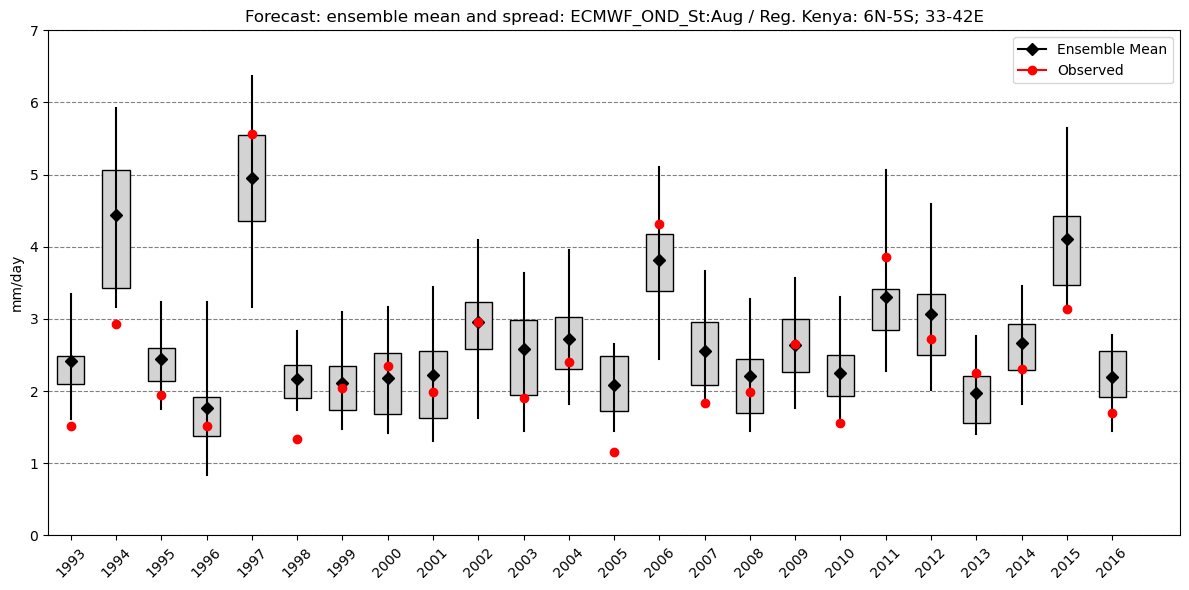

In [7]:
import matplotlib.pyplot as plt
import numpy as np


years = da.year.values
observed = Obs_Rain
ensemble_mean = Yearly_Forecast_mean
min_forecast = Yearly_Forecast_Min
max_forecast = Yearly_Forecast_Max
lower_quartile = Yearly_Forecast_LQ
upper_quartile = Yearly_Forecast_UQ

# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Plot box plots manually using quartiles and whiskers
for i, year in enumerate(years):
    # Draw the box (IQR) in grey
    ax.add_patch(plt.Rectangle((year - 0.3, lower_quartile[i]), 0.6, upper_quartile[i] - lower_quartile[i],
                               edgecolor='black', facecolor='lightgrey'))
    # Draw the whiskers (range)
    ax.plot([year, year], [min_forecast[i], max_forecast[i]], color='black')
    # Draw the ensemble mean as a black diamond (mean value)
    ax.plot(year, ensemble_mean[i], marker='D', color='black', label='Ensemble Mean' if i == 0 else "")
    # Draw the observed value as a black circle (Obs_rain)
    ax.plot(year, observed[i], marker='o', color='red', label='Observed' if i == 0 else "")


ax.set_xticks(years)
ax.set_xticklabels(years, rotation=45)
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed')
ax.set_ylabel('mm/day')
ax.set_title('Forecast: ensemble mean and spread: ECMWF_OND_St:Aug / Reg. Kenya: 6N-5S; 33-42E')
ax.set_xlim([1992.5, 2017.5])
ax.set_ylim([0, 7])
ax.legend()

plt.tight_layout()
plt.show()


# You have now finished EX 3; Please refer to the powerpoint on what to do next. 
## Copy the image of the plot into the powerpoint 